# Bike Sharing Assignment

### overview of the dataset structure:

instant: A record index.

dteday: Date of the record.

season: Season code (1: spring, 2: summer, 3: fall, 4: winter).

yr: Year (0: 2018, 1: 2019).

mnth: Month (1 to 12).

holiday: Indicates whether the day is a holiday.

weekday: Day of the week.

workingday: Indicates whether the day is neither a weekend nor a holiday.

weathersit: Weather situation.

temp: Temperature in Celsius.

atemp: "Feels like" temperature in Celsius.

hum: Humidity.

windspeed: Wind speed.

casual: Count of casual users.

registered: Count of registered users.

cnt: Total count of bike rentals (target variable).

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Data Preparation

In [1]:
#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Load the dataset
data_path = 'data.csv'
df = pd.read_csv(data_path)

In [3]:
# Load the top rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations:  
1. Total of 730 records in the dataset
2. No missing values in any of the columns
3. 'season' and 'weathersit' are categorical variables

## Step 2: Exploratory data analysis

In [6]:
# Convert Categorical Variables
# Convert 'season' and 'weathersit' to categorical string values

df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice Pallets'
})

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Overview of the dataset
df.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observations:
a) Temperature (temp and atemp): The average temperature recorded is around 20.32°C, with a "feels like" temperature (atemp) averaging at 23.73°C. These metrics range from a minimum of around 2.42°C to a maximum of 35.33°C for temp, and 3.95°C to 42.04°C for atemp, indicating a wide variety of weather conditions throughout the dataset.

b) Humidity (hum): The average humidity level is approximately 62.77%, with values ranging from 0% (which could be data errors) to 97.25%.

c) Wind Speed (windspeed): The average wind speed is around 12.76 km/h, with a broad range from 1.5 km/h to 34 km/h, suggesting variable wind conditions.

d) Casual and Registered Users (casual, registered): On average, there are more registered users (3658.76) renting bikes than casual users (849.25). The total bike rentals (cnt) have an average of 4508.01, with a wide range from 22 to 8714, indicating significant variability in daily rental volumes.

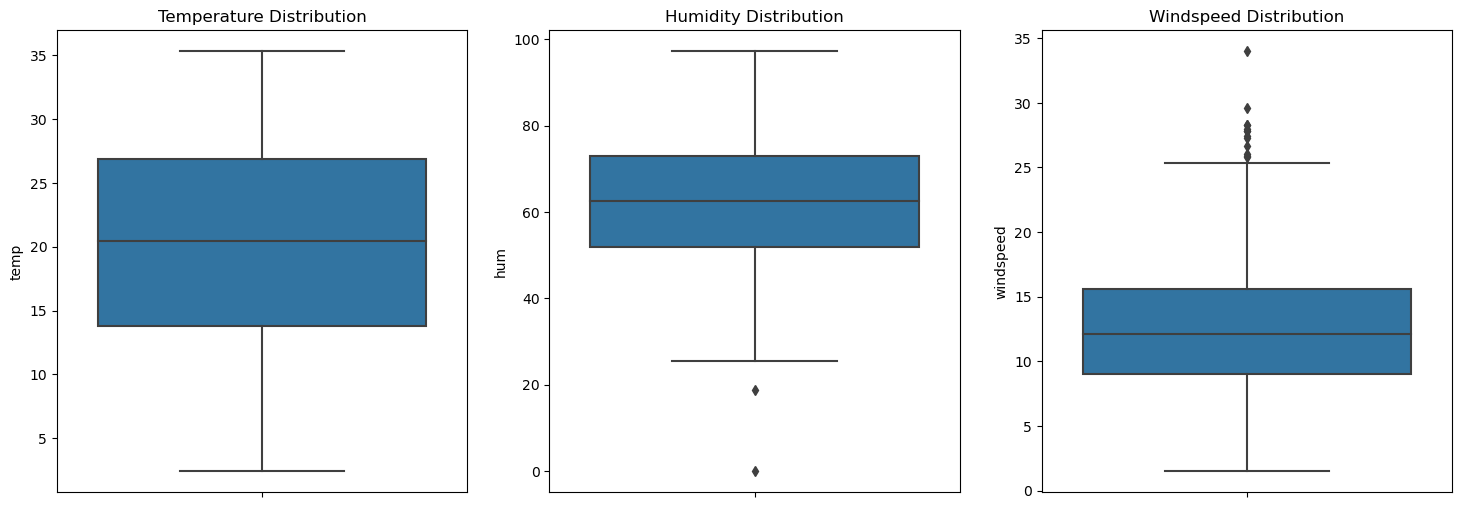

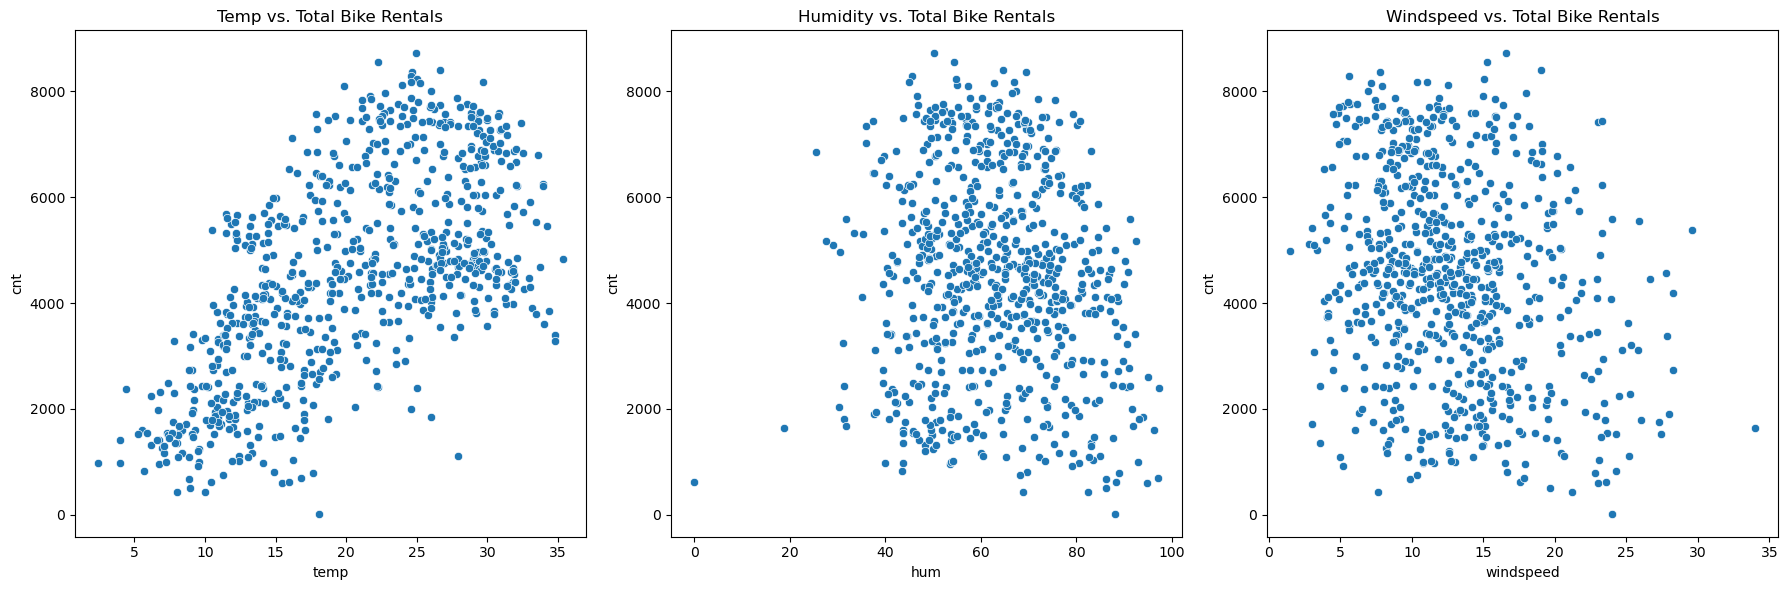

In [9]:
# Let's perform a more detailed exploratory data analysis on the data

# Boxplot for temperature, humidity, and windspeed
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(y=df['temp'], ax=ax[0])
ax[0].set_title('Temperature Distribution')
sns.boxplot(y=df['hum'], ax=ax[1])
ax[1].set_title('Humidity Distribution')
sns.boxplot(y=df['windspeed'], ax=ax[2])
ax[2].set_title('Windspeed Distribution')

# Scatter plots for 'temp', 'hum', and 'windspeed' against 'cnt'
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x=df['temp'], y=df['cnt'], ax=ax[0])
ax[0].set_title('Temp vs. Total Bike Rentals')
sns.scatterplot(x=df['hum'], y=df['cnt'], ax=ax[1])
ax[1].set_title('Humidity vs. Total Bike Rentals')
sns.scatterplot(x=df['windspeed'], y=df['cnt'], ax=ax[2])
ax[2].set_title('Windspeed vs. Total Bike Rentals')

plt.tight_layout()


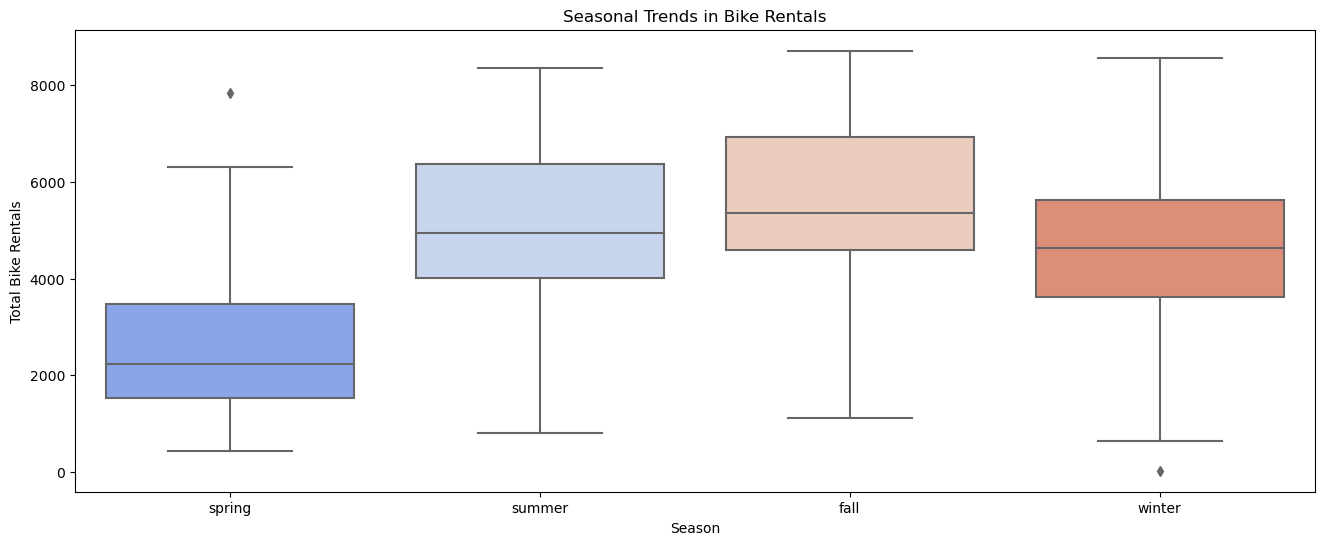

In [10]:
# Seasonal trends in bike rentals
plt.figure(figsize=(16, 6))
sns.boxplot(x='season', y='cnt', data=df, palette='coolwarm')
plt.title('Seasonal Trends in Bike Rentals')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.show()

### Obervations:
Seasonal Trends: The boxplots indicate that bike rentals are highest in fall and summer, followed by spring and significantly lower in winter. This suggests that weather and temperature play a significant role in bike rental demand.

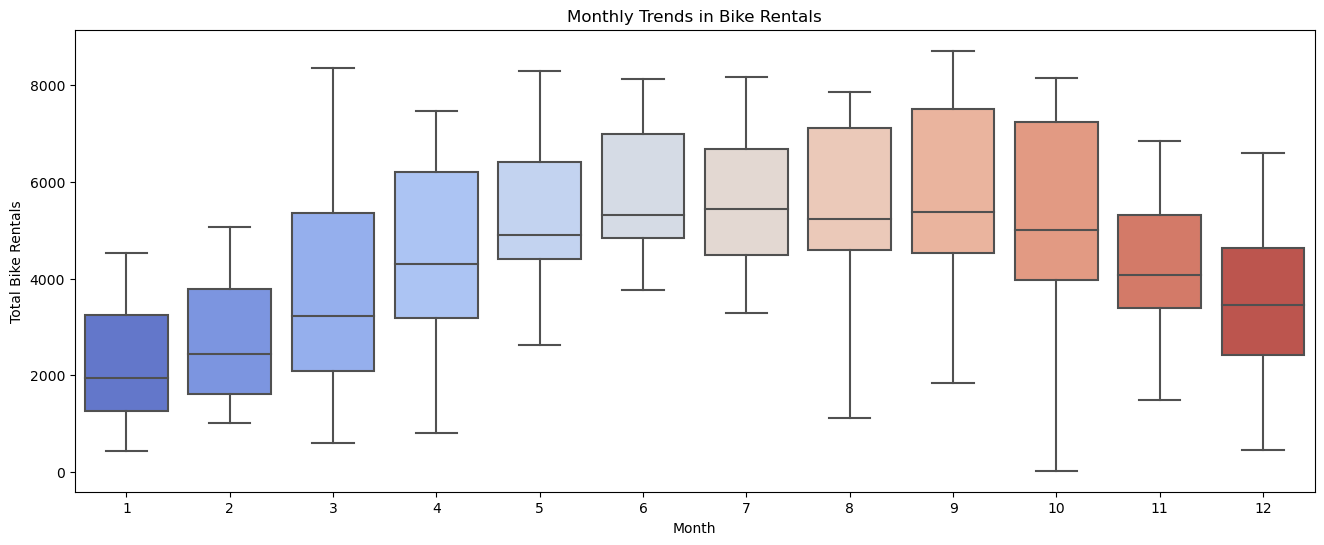

In [11]:
# Monthly trends in bike rentals
plt.figure(figsize=(16, 6))
sns.boxplot(x='mnth', y='cnt', data=df, palette='coolwarm')
plt.title('Monthly Trends in Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.show()

### Obervations:
Monthly Trends: There's a clear pattern where the months in the middle of the year (May to October) show higher bike rentals, aligning with warmer weather and summer seasonality.

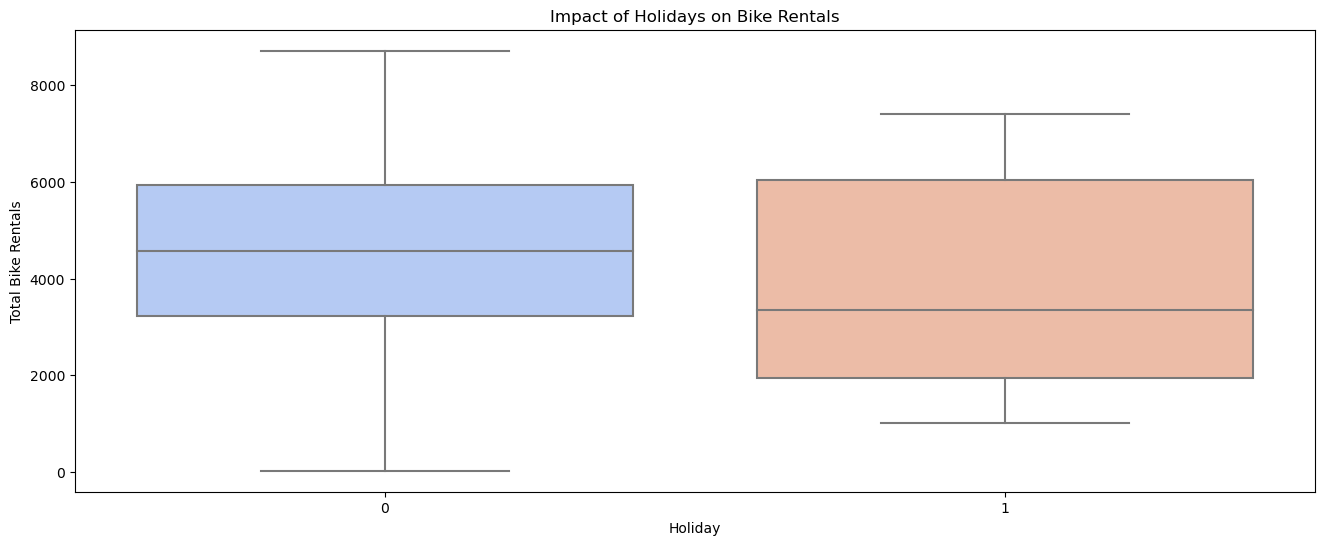

In [12]:
# Impact of holidays on bike rentals
plt.figure(figsize=(16, 6))
sns.boxplot(x='holiday', y='cnt', data=df, palette='coolwarm')
plt.title('Impact of Holidays on Bike Rentals')
plt.xlabel('Holiday')
plt.ylabel('Total Bike Rentals')
plt.show()

### Obervations:
Holidays: The impact of holidays on bike rentals does not show a significant difference compared to non-holidays, suggesting that holidays might not have a strong influence on overall bike rental demand.

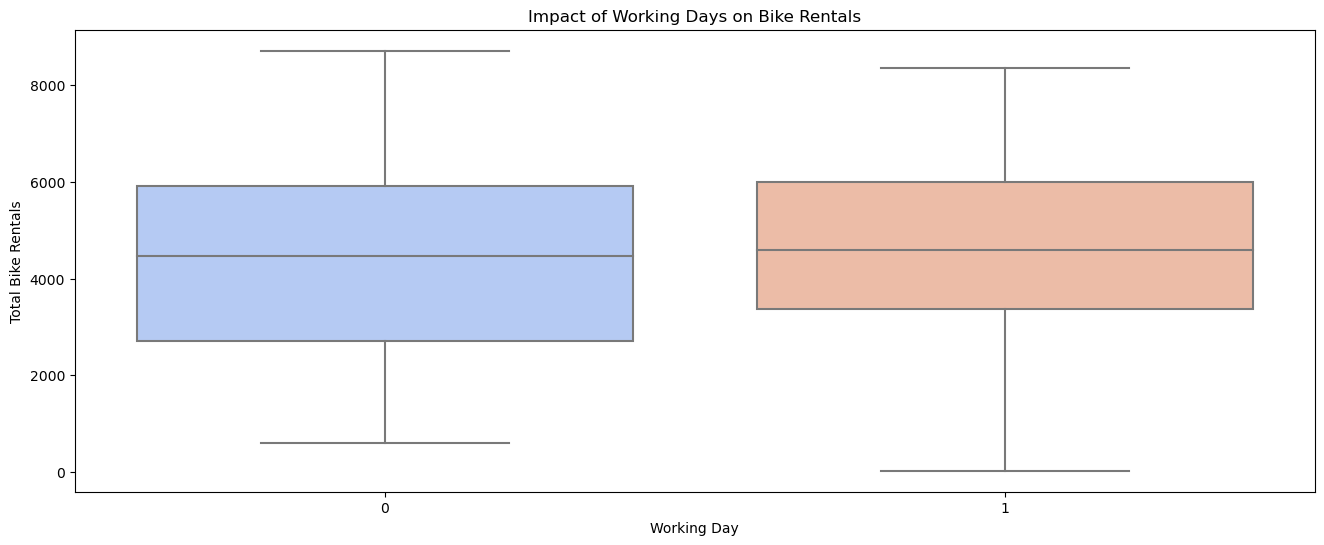

In [13]:
# Impact of working days on bike rentals
plt.figure(figsize=(16, 6))
sns.boxplot(x='workingday', y='cnt', data=df, palette='coolwarm')
plt.title('Impact of Working Days on Bike Rentals')
plt.xlabel('Working Day')
plt.ylabel('Total Bike Rentals')
plt.show()

### Obervations:
Working Days: Similarly, working days and non-working days (which include weekends and holidays) do not show a stark difference in bike rentals, indicating that bike usage is relatively consistent across these types.

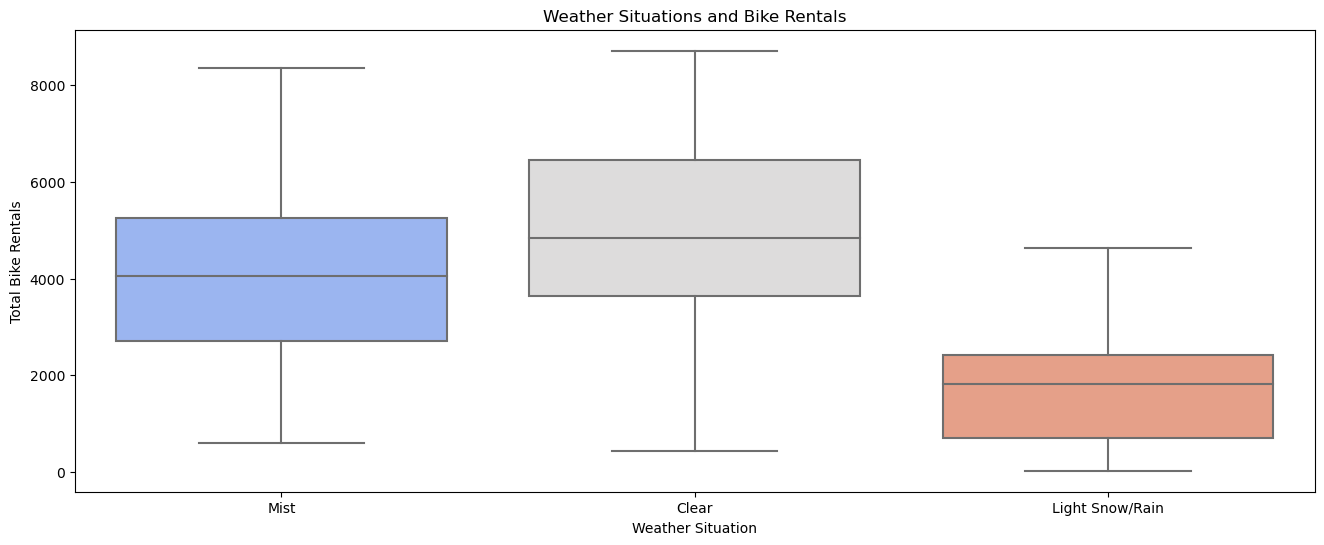

In [14]:
# Weather situations and their effects on bike rentals
plt.figure(figsize=(16, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette='coolwarm')
plt.title('Weather Situations and Bike Rentals')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.show()

### Obervations:
Weather Situations: The weather situations significantly affect bike rentals. Clear weather conditions show the highest bike rental numbers, followed by Mist conditions. Light Snow/Rain shows a decrease in rentals, and Heavy Rain/Ice Pallets (which are rare events in the dataset) show the least. This highlights the importance of weather conditions in influencing bike rental behavior.

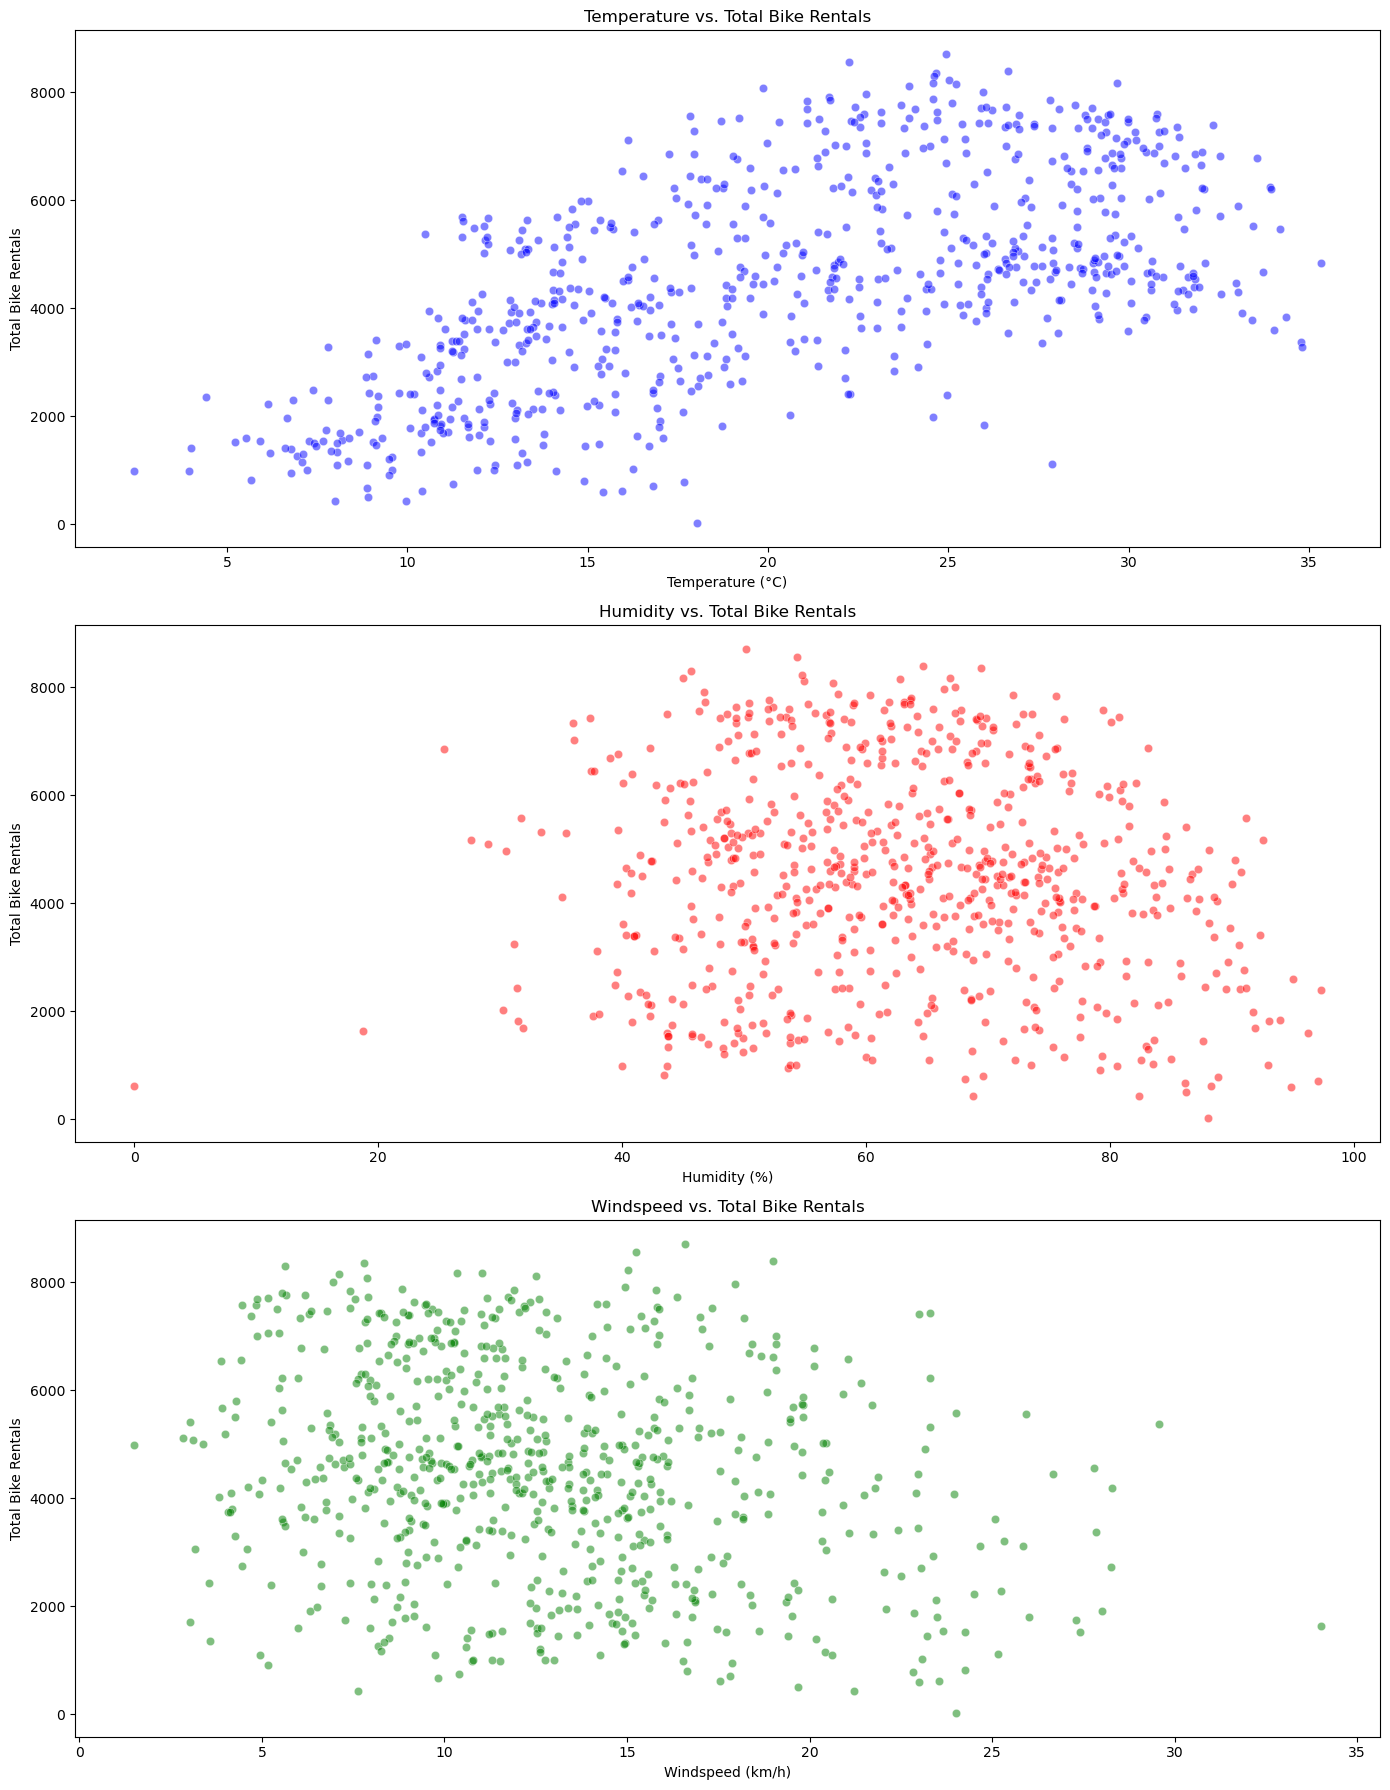

In [15]:
# Relationship between weather conditions and bike rentals
fig, axs = plt.subplots(3, 1, figsize=(14, 18))
sns.scatterplot(x='temp', y='cnt', data=df, ax=axs[0], color='blue', alpha=0.5)
axs[0].set_title('Temperature vs. Total Bike Rentals')
axs[0].set_xlabel('Temperature (°C)')
axs[0].set_ylabel('Total Bike Rentals')

sns.scatterplot(x='hum', y='cnt', data=df, ax=axs[1], color='red', alpha=0.5)
axs[1].set_title('Humidity vs. Total Bike Rentals')
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Total Bike Rentals')

sns.scatterplot(x='windspeed', y='cnt', data=df, ax=axs[2], color='green', alpha=0.5)
axs[2].set_title('Windspeed vs. Total Bike Rentals')
axs[2].set_xlabel('Windspeed (km/h)')
axs[2].set_ylabel('Total Bike Rentals')

plt.tight_layout()
plt.show()

### Obervations:
Temperature vs. Total Bike Rentals: There's a positive relationship between temperature and bike rentals, indicating that warmer temperatures lead to an increase in bike rentals.

Humidity vs. Total Bike Rentals: The relationship between humidity and bike rentals doesn't show a clear trend, suggesting that humidity may not be a strong predictor for bike rentals compared to temperature.

Windspeed vs. Total Bike Rentals: Similar to humidity, windspeed does not show a clear relationship with bike rentals, indicating it may not be a significant predictor of rental demand.

/Users/sohil/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


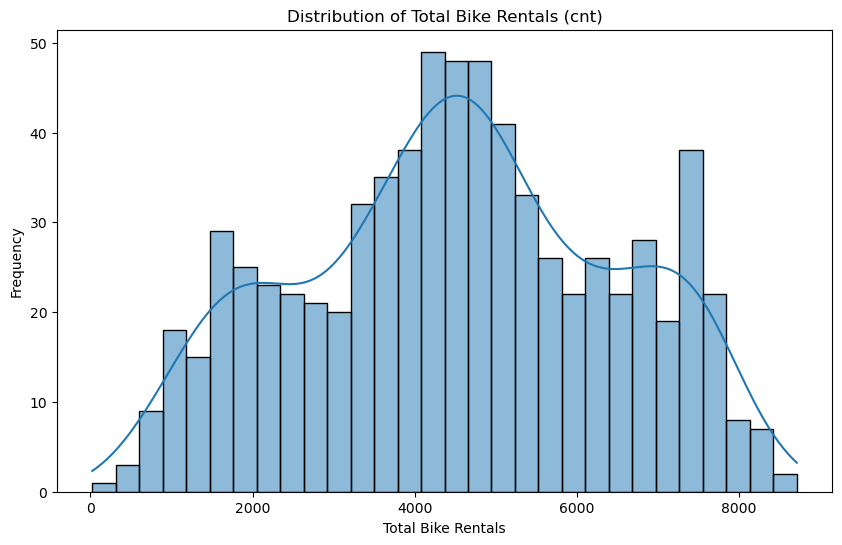

In [16]:
# Checking the distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals (cnt)')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

### Observations:
Distribution of Total Bike Rentals (cnt): The histogram shows a somewhat right-skewed distribution for the total bike rentals. This suggests that there are days with exceptionally high rental numbers, but most of the days have moderate to low rentals.

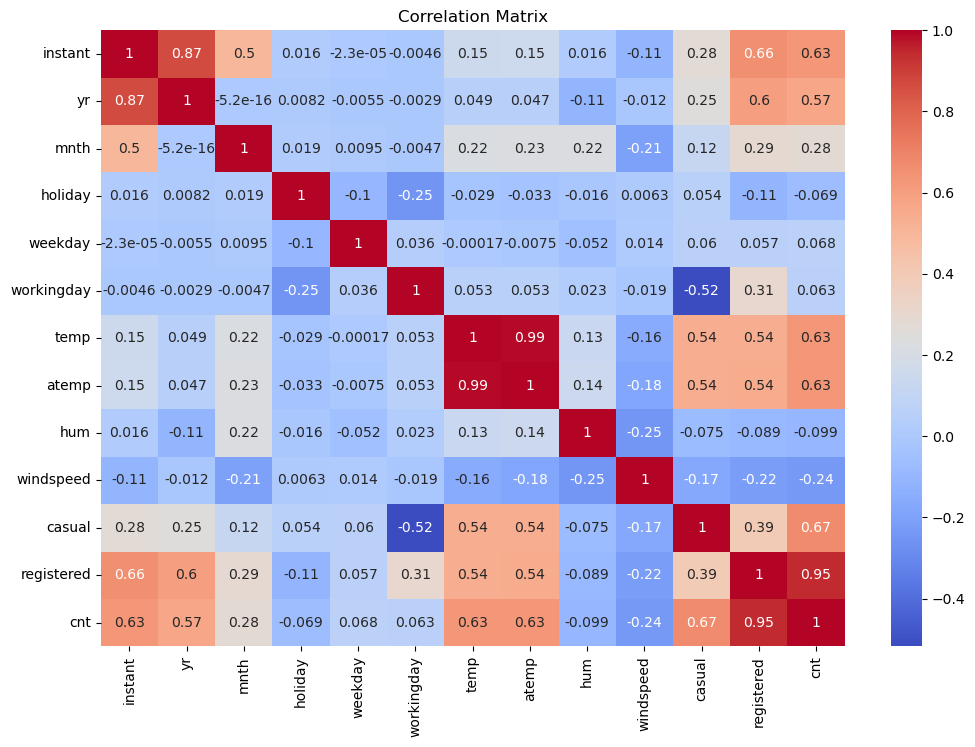

In [17]:
# Checking correlations among numerical variables

# Selecting only the numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Checking correlations among numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observations:
Correlation Matrix: The correlation matrix reveals several interesting correlations between variables and the target variable cnt:
- The variables yr (year), temp (temperature), and atemp (feeling temperature) show a positive correlation with cnt, indicating that these could be significant predictors for bike rentals. It's worth noting that temp and atemp are highly correlated, suggesting multicollinearity, which might necessitate choosing one over the other or combining them somehow.
- The variables hum (humidity) and windspeed have a negative correlation with cnt, suggesting that higher humidity and wind speed might lead to fewer bike rentals.
- The season, holiday, weekday, workingday, and weathersit variables, being categorical, are not included in this correlation matrix but are essential for the model due to their potential impact on rental behavior.

## Step 3: Model Building

In [18]:
# One-hot encoding for categorical variables
df_model = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

In [19]:
# Including 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed' in the model
# Dropping unnecessary columns for modeling ('instant', 'dteday', 'atemp', 'casual', 'registered')
# 'atemp' is dropped to avoid multicollinearity with 'temp'
df_model = df_model.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis=1)

In [20]:
# Splitting the dataset into training and testing sets
X = df_model.drop('cnt', axis=1)
y = df_model['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Model Building: Training a multiple linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Model Evaluation: Predicting on the test set 
y_pred = lr_model.predict(X_test)

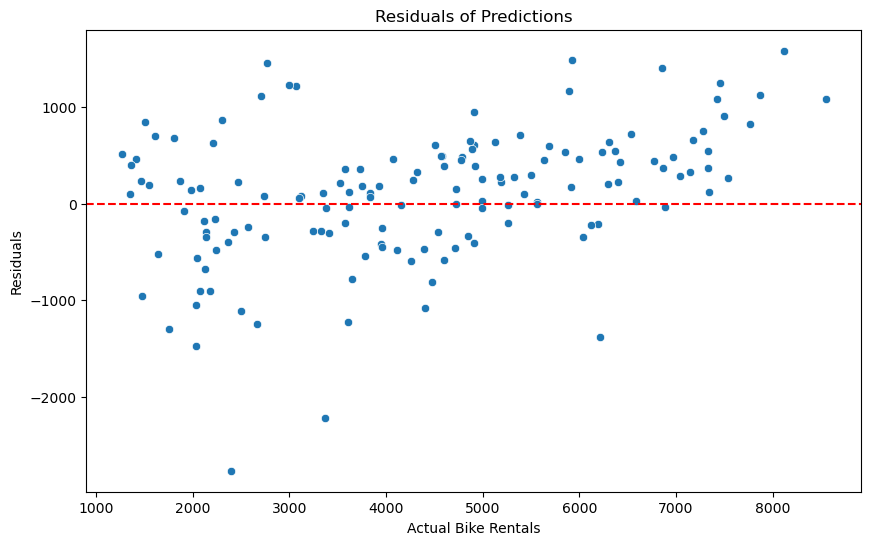

In [24]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Actual Bike Rentals')
plt.ylabel('Residuals')
plt.show()

### Observations
Residual Plot: The scatter plot of residuals does not show a clear pattern, suggesting that our linear model does a reasonable job of capturing the relationship between the variables and bike rentals. However, the spread of residuals indicates variability in the model's prediction accuracy across different levels of actual bike rentals.

In [25]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

687.3932848120785

### Observations
Root Mean Square Error (RMSE): The RMSE of the model is approximately 687.39. This value represents the standard deviation of the residuals, indicating on average how much the predictions deviate from the actual values.

In [26]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape

15.494870659644407

### Observations
Mean Absolute Percentage Error (MAPE): The MAPE is about 15.49%, which provides an indication of the prediction accuracy in terms of the percentage error relative to actual values.

In [27]:
# Model Evaluation: calculating R-squared
r2_score_test = r2_score(y_test, y_pred)

r2_score_test

0.8619540334001592

### Observations:
R2 score of approximately 0.862, suggest that while the model is strong in explaining the variance in bike rental demand, there's room for improvement in prediction accuracy, particularly for specific segments of data where the model's predictions deviate more from the actual values.

### Model Explanation: 
The significant predictors based on the initial model include temperature (with a positive relationship) and season, indicating their crucial role in determining bike rental demand. Yearly growth (captured by the yr variable) also suggests increasing popularity and demand for bike rentals over time.

While our current analysis has focused on linear regression, exploring other models such as decision trees, random forests, or gradient boosting machines could provide insights into nonlinear relationships and feature interactions. This exploration could potentially improve model performance and provide a more nuanced understanding of demand dynamics.